Multilayer Percepton 

Vamos utilizar o MLP, aplicando mais camadas a rede de neurônios, para resolvermos um dataset mais complexo.

In [32]:
#importando bibliotecas
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [33]:
#amostra
nb_samples = 1000

#inicializando as matrizes 
X = np.zeros(shape=(nb_samples, 2), dtype= np.float32)
Y = np.zeros(shape=(nb_samples,), dtype= np.float32)

t = 15.0 * np.random.uniform(0.0, 1.0, size= (int(nb_samples/2), 1))

In [34]:
#dados para o treinamento do modelo
X[0:int(nb_samples/2), :] = t*np.hstack([-np.cos(t), np.sin(t)]) + \
    np.random.uniform(0.0, 1.8, size= (int(nb_samples/2), 2))

Y [0:int(nb_samples/2)] = 0

X[int(nb_samples/2):, :] = t*np.hstack([np.cos(t), -np.sin(t)]) + \
    np.random.uniform(0.0, 1.8, size= (int(nb_samples/2), 2))

Y[int(nb_samples/2):] = 1

In [35]:
#padronização dos dados
ss = StandardScaler()

X = ss.fit_transform(X)

In [36]:
#embaralhando aleatoriamente as amostras e seus respectivos rótulos
X, Y = shuffle(X, Y, random_state= 10000)

In [37]:
#superfície de decisão do modelo de rede neural.
def plot_surface_model(model):    

    Xm = np.linspace(min(X[:, 0]), max(X[:, 0]), 1000)
    Ym = np.linspace(min(X[:, 1]), max(X[:, 1]), 1000)
    Xmg, Ymg = np.meshgrid(Xm, Ym)
    X_eval = np.vstack([Xmg.ravel(), Ymg.ravel()]).T
    X_eval = np.float32(X_eval)
    Y_eval_mlp = np.argmax(model.predict(X_eval), axis=1)

    plt.scatter(X_eval[:, 0], X_eval[:, 1], c=Y_eval_mlp)
    plt.show()

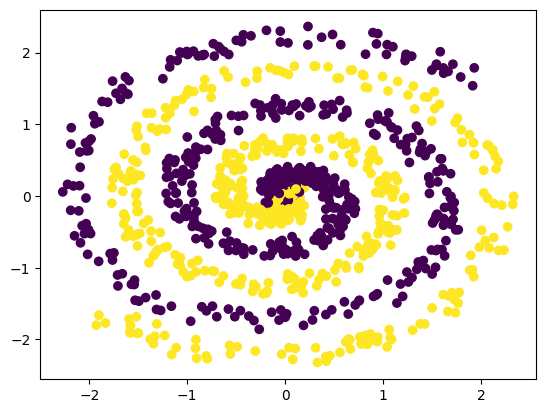

In [38]:
#plotando o dataset

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [50]:
#separação dos conjuntos de treino e conjuntos de teste

#importando bibliotecas
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

#conjunto de treino e conjunto de teste
X_train, X_test, Y_train, Y_test = train_test_split(X, to_categorical(Y), test_size= 0.30, random_state= 1000, shuffle=False)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_train), len(X_test)))

Treinaremos com 700 elementos e testaremos com 300 elementos


Vamos definir uma rede neural profunda com 4 camadas

In [51]:
#importando bibliotecas

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [52]:
#modelo de rede neural sequencial com camadas densas
def build_model_ex ():
    
    model =  Sequential()

    model.add(Dense(64, input_dim= 2))
    model.add(Activation('relu'))

    model.add(Dense(32))
    model.add(Activation('relu'))

    model.add(Dense(16))
    model.add(Activation('softmax'))

    model.add(Dense(2))
    model.add(Activation('softmax'))

    return model

Geração do modelo

In [53]:
#importando bibliotecas necessárias
from keras.optimizers import SGD


#gerando o modelo
sgd_model = build_model_ex()

sgd = SGD(learning_rate=0.01, momentum=0.99, nesterov=True)

sgd_model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
#treinando o modelo

history = sgd_model.fit(X_train, Y_train, 
          epochs= 150, 
          batch_size= 42,
          validation_data=(X_test, Y_test))

Epoch 1/150
17/17 [==============================] - 1s 20ms/step - loss: 0.6928 - accuracy: 0.5029 - val_loss: 0.6920 - val_accuracy: 0.5300
Epoch 2/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5386 - val_loss: 0.6922 - val_accuracy: 0.4967
Epoch 3/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5014 - val_loss: 0.6928 - val_accuracy: 0.4967
Epoch 4/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5000 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 5/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6907 - accuracy: 0.5686 - val_loss: 0.6909 - val_accuracy: 0.5533
Epoch 6/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6895 - accuracy: 0.5729 - val_loss: 0.6902 - val_accuracy: 0.5500
Epoch 7/150
17/17 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.5657 - val_loss: 0.6895 - val_accuracy: 0.5467
Epoch 8/150


Verificando o resultado

In [55]:
#geração da predição com base de teste

Y_eval_mlp = np.argmax(sgd_model.predict(X), axis = 1)

32/32 [==============================] - 0s 2ms/step


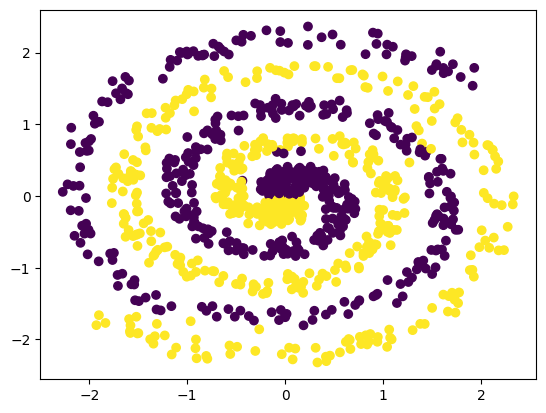

In [56]:
#plotando os resultados

plt.scatter(X[:, 0], X[:, 1], c=Y_eval_mlp)
plt.show()

31250/31250 [==============================] - 56s 2ms/step


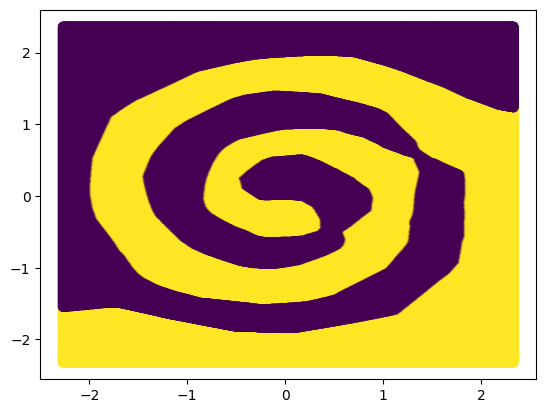

In [57]:
#plotando a superfície de predição

plot_surface_model(sgd_model)

Verificando a qualidade do modelo

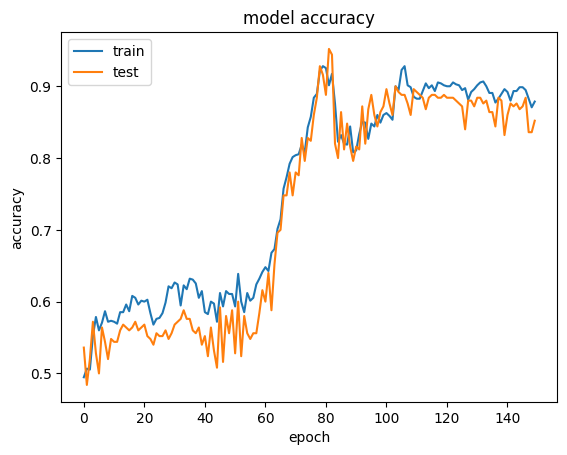

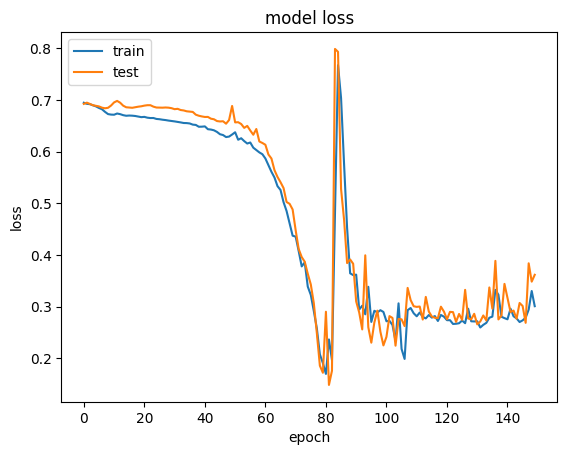

In [49]:
#sumarizando o histórico para verificação da acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#sumarizando o histórico para verificação da perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()